In [8]:
import os
import sys
from phenox.phenox import PhenoX
from phenox.paths import PhenoXPaths

email = "test@test.xyz"
query_str = "Psoriasis"
paths = PhenoXPaths()

phenox = PhenoX(email, query_str)

In [2]:
# Get closest MeSH term and its children
mesh_term, mesh_children = phenox._get_best_mesh_term()

print('Closest MeSH term:')
print(mesh_term['ids'])
print(mesh_term['name'])

print()
print('Children: %s' % '; '.join(mesh_children))

Closest MeSH term:
['C17.800.859.675']
Psoriasis

Children: Arthritis, Psoriatic


In [5]:
# Get GEO datasets
pubmed_dict = phenox._get_geo_datasets(mesh_term['name'])

Retrieving matching GEO datasets...


100%|██████████| 1753/1753 [00:00<00:00, 47239.95it/s]


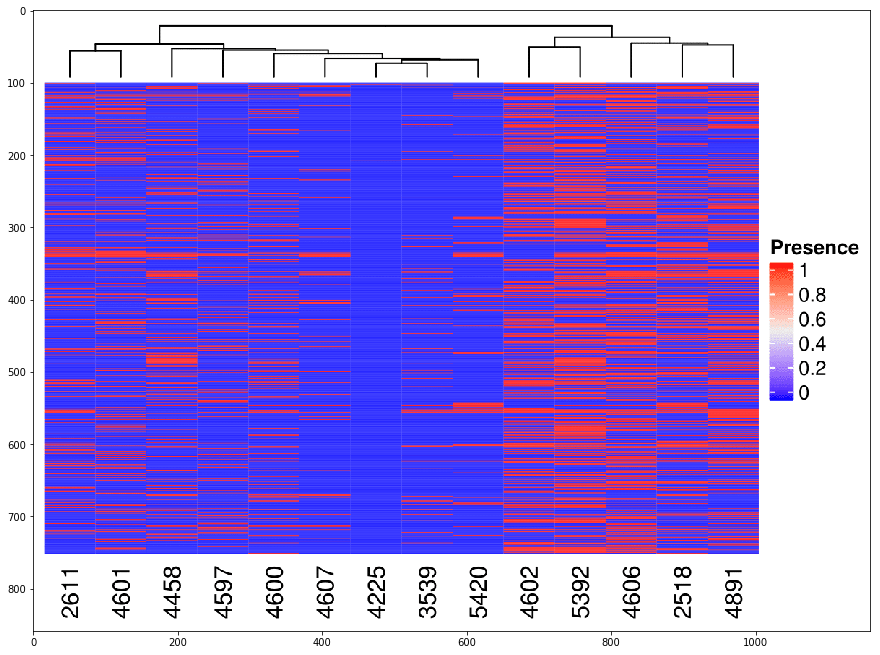

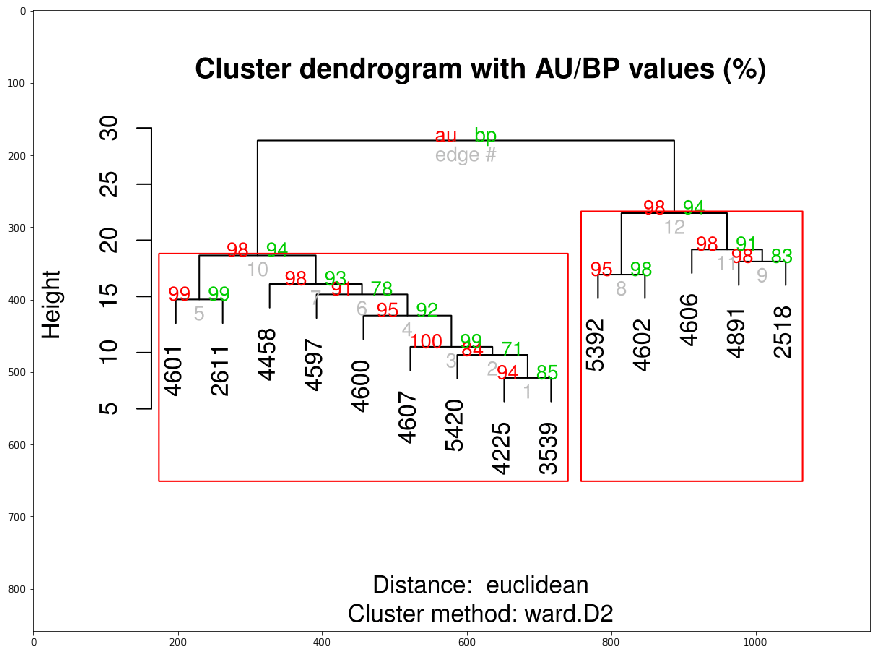

In [30]:
# The R script generates a heatmap and cluster diagram with the GEO datasets

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

heatmap_file = os.path.join(paths.base_dir, 'docs', 'heatmap-1.png')

img = mpimg.imread(heatmap_file)
fig = plt.figure(figsize = (12,12))
plt.imshow(img)
plt.show()

cluster_file = os.path.join(paths.base_dir, 'docs', 'hcluster-1.png')

img = mpimg.imread(cluster_file)
fig = plt.figure(figsize = (12,12))
plt.imshow(img)
plt.show()

Retrieving matching PubMed abstracts...


100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


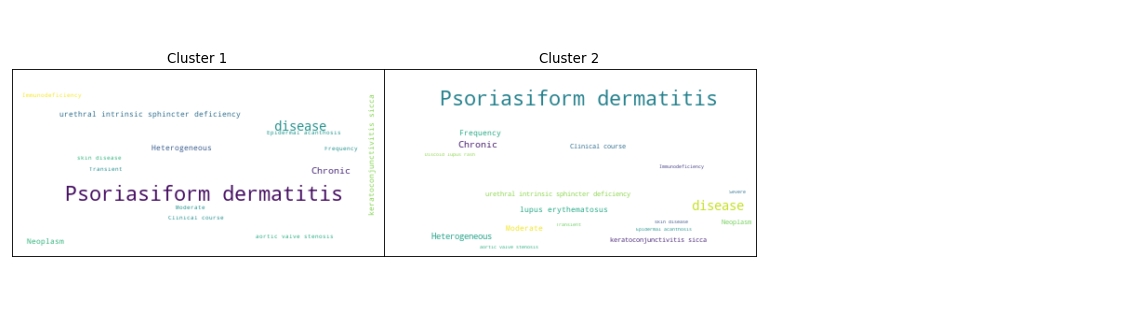

Wordcloud saved to /Users/lwang/git/phenotypeXpression/output/wordcloud.png


In [22]:
# The GDS clusters are linked to PubMed abstracts, those abstracts are fetched, 
# NER is performed and, a word cloud is generated for each group
term_frequency = phenox._fetch_pubmed_abstracts(pubmed_dict)    
phenox._visualize(term_frequency)

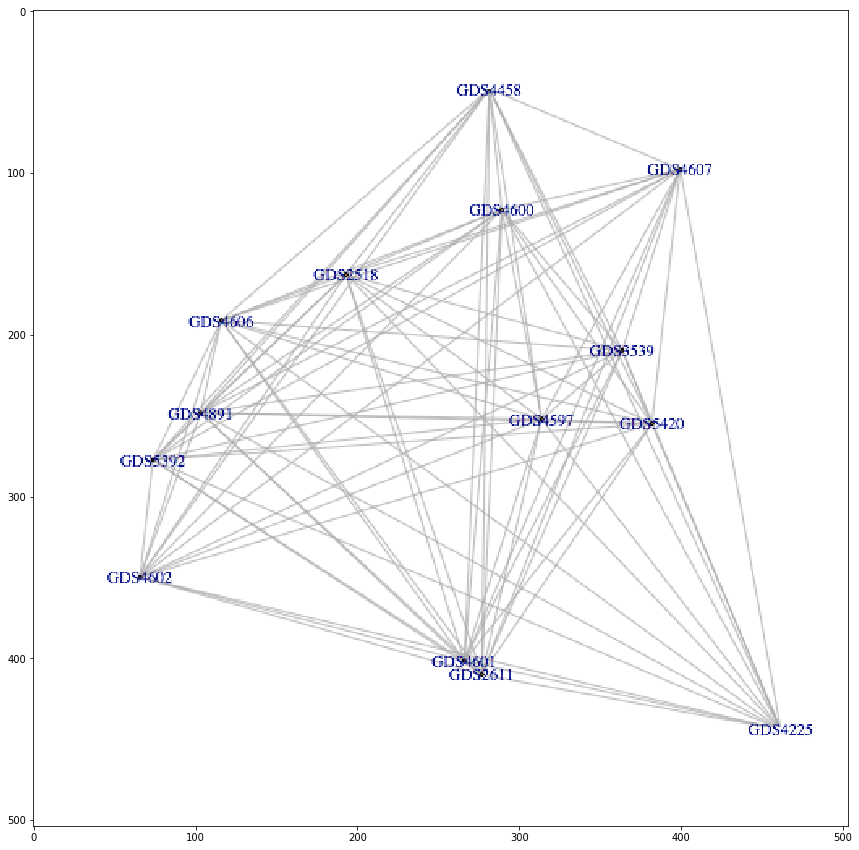

In [29]:
# Pairwise distance between GDS datasets

network_file = os.path.join(paths.base_dir, 'docs', 'image.png')

img = mpimg.imread(network_file)
fig = plt.figure(figsize = (12,12))
plt.imshow(img)
plt.show()